In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install shap
!pip install umap-learn 
!pip install hdbscan
!pip install scprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 11.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=ec35d36c7649a2f65528d095bbf6d7b5b9e39ee1a2a6c68c5c98e6149563f786
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=f4e66712314f38aae9a2cce19550ef2ab396b7ec594bb1fe47adc9a206b961b0
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt
%matplotlib inline
#import scipy.stats.stats as st #for skewness and kurtosis 

## Importing the dataset

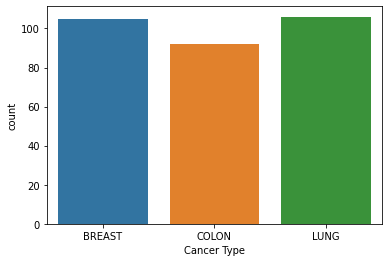

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/integracion/concat all cancer (3)/breast,colon,lung.csv', index_col=0)
sns.countplot(x='Cancer Type', data=df)

# Rotate x-labels
#plt.xticks(rotation=-45)
y_count = df['Cancer Type'].value_counts()


In [ ]:
df

,AKAP5,IBSP,ELAVL2,IRS4,S100G,C1orf129,COL11A1,FIGF,ATP1A2,COL10A1,...,hsa-mir-940,hsa-mir-942,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,Survival,Death,Cancer Type
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TCGA-A1-A0SD-01A,-0.856922,0.277832,0.678194,-0.572711,-0.430044,0.247616,1.176420,-0.873279,-0.157498,1.079129,...,-0.611247,-0.808270,-0.387279,-0.678779,-0.403978,0.367660,-0.274343,437,0,BREAST
TCGA-A2-A04N-01A,-0.559035,0.279705,0.029191,-0.163045,0.041168,-0.513600,0.940513,-1.198599,0.124019,-0.133420,...,-0.534567,-1.176446,-1.228456,-1.234875,-1.248065,-0.094852,-0.338154,3153,0,BREAST
TCGA-A2-A04U-01A,-0.266071,0.239631,1.522694,0.010476,-0.541179,-0.678920,0.663927,-0.488989,-1.100454,0.380436,...,1.805380,2.823522,0.138590,-0.440280,1.992130,-1.027634,-0.122170,670,0,BREAST
TCGA-A2-A04W-01A,-0.261968,0.340002,-0.373350,-0.760584,-0.472789,-0.596525,1.053766,-1.592443,-0.384346,0.675924,...,-0.053770,-0.268950,-0.333357,0.862831,-0.462116,0.823365,0.709428,1918,0,BREAST
TCGA-A2-A0CL-01A,0.127010,-1.001897,-0.676351,-0.296121,0.062711,0.033923,-1.173687,1.044218,0.265531,-1.730732,...,0.170070,1.838804,-0.407384,-0.741858,0.054231,-0.424432,-0.842433,1827,0,BREAST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-66-2792-01A,-0.367744,0.162595,-0.301941,-0.281606,0.669649,-1.114531,0.936215,-0.641542,-0.473247,0.851919,...,0.767085,-0.193723,-0.189331,-0.054615,-0.048987,-0.572052,-0.675943,913,1,LUNG
TCGA-66-2793-01A,-0.156447,-0.811743,0.058055,-0.434062,-0.662874,1.149406,-1.956718,-0.755230,-0.972202,-1.623661,...,4.262834,2.285601,-0.316850,0.530020,0.501132,5.327140,4.201758,306,0,LUNG
TCGA-66-2794-01A,-0.097110,-0.240758,0.706040,-0.901657,-0.549728,1.269940,-1.477433,-0.530849,-0.330126,-0.996660,...,-0.645287,0.177253,-0.093456,0.566212,-0.219955,0.478386,-0.967191,1645,1,LUNG


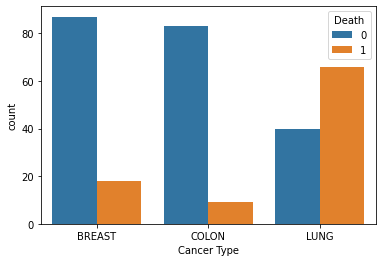

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/integracion/concat all cancer (3)/breast,colon,lung.csv', index_col=0)
sns.countplot(x='Cancer Type', data=df,hue='Death')

# Rotate x-labels
#plt.xticks(rotation=-45)

y_count = df['Cancer Type'].value_counts()


In [ ]:
y_count

LUNG      106
BREAST    105
COLON      92
Name: Cancer Type, dtype: int64

In [ ]:
print('Number of patients with LUNG cancer:', y_count[0])
print('Number of patients with BREAST cancer:', y_count[1])
print('Number of patients with COLON cancer:', y_count[2])

Number of patients with LUNG cancer: 106
Number of patients with BREAST cancer: 105
Number of patients with COLON cancer: 92


In [ ]:
df[df['Cancer Type'] == "BREAST"]['Survival']




Unnamed: 0
TCGA-A1-A0SD-01A     437
TCGA-A2-A04N-01A    3153
TCGA-A2-A04U-01A     670
TCGA-A2-A04W-01A    1918
TCGA-A2-A0CL-01A    1827
                    ... 
TCGA-E2-A15O-01A     395
TCGA-E2-A15P-01A     315
TCGA-E2-A15R-01A     330
TCGA-E2-A15S-01A     274
TCGA-E2-A15T-01A     267
Name: Survival, Length: 105, dtype: int64

In [ ]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = df[df['Cancer Type'] == "BREAST"]['Survival']
x2 = df[df['Cancer Type'] == "COLON"]['Survival']
x3 = df[df['Cancer Type'] == "LUNG"]['Survival']


# Group data together
hist_data = [x1, x2, x3]
group_labels = ['BREAST', 'COLON', 'LUNG']


# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=100)
fig.show()

In [ ]:
df_WORK = df.iloc[:,:-3]
df_WORK

,AKAP5,IBSP,ELAVL2,IRS4,S100G,C1orf129,COL11A1,FIGF,ATP1A2,COL10A1,...,hsa-mir-93,hsa-mir-937,hsa-mir-939,hsa-mir-940,hsa-mir-942,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TCGA-A1-A0SD-01A,-0.856922,0.277832,0.678194,-0.572711,-0.430044,0.247616,1.176420,-0.873279,-0.157498,1.079129,...,-0.751327,0.001966,-0.806222,-0.611247,-0.808270,-0.387279,-0.678779,-0.403978,0.367660,-0.274343
TCGA-A2-A04N-01A,-0.559035,0.279705,0.029191,-0.163045,0.041168,-0.513600,0.940513,-1.198599,0.124019,-0.133420,...,-1.079665,-0.254155,3.465315,-0.534567,-1.176446,-1.228456,-1.234875,-1.248065,-0.094852,-0.338154
TCGA-A2-A04U-01A,-0.266071,0.239631,1.522694,0.010476,-0.541179,-0.678920,0.663927,-0.488989,-1.100454,0.380436,...,4.895185,-0.147610,0.069765,1.805380,2.823522,0.138590,-0.440280,1.992130,-1.027634,-0.122170
TCGA-A2-A04W-01A,-0.261968,0.340002,-0.373350,-0.760584,-0.472789,-0.596525,1.053766,-1.592443,-0.384346,0.675924,...,-0.648887,-0.368345,-0.748855,-0.053770,-0.268950,-0.333357,0.862831,-0.462116,0.823365,0.709428
TCGA-A2-A0CL-01A,0.127010,-1.001897,-0.676351,-0.296121,0.062711,0.033923,-1.173687,1.044218,0.265531,-1.730732,...,-0.584372,-0.264408,-0.704365,0.170070,1.838804,-0.407384,-0.741858,0.054231,-0.424432,-0.842433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-66-2792-01A,-0.367744,0.162595,-0.301941,-0.281606,0.669649,-1.114531,0.936215,-0.641542,-0.473247,0.851919,...,1.304475,-0.198500,-0.288869,0.767085,-0.193723,-0.189331,-0.054615,-0.048987,-0.572052,-0.675943
TCGA-66-2793-01A,-0.156447,-0.811743,0.058055,-0.434062,-0.662874,1.149406,-1.956718,-0.755230,-0.972202,-1.623661,...,1.763383,0.194593,3.383568,4.262834,2.285601,-0.316850,0.530020,0.501132,5.327140,4.201758
TCGA-66-2794-01A,-0.097110,-0.240758,0.706040,-0.901657,-0.549728,1.269940,-1.477433,-0.530849,-0.330126,-0.996660,...,0.583487,0.350161,-0.654385,-0.645287,0.177253,-0.093456,0.566212,-0.219955,0.478386,-0.967191


In [ ]:
df_tags = df.iloc[:,-3:]
df_tags



,Survival,Death,Cancer Type
Unnamed: 0,,,
TCGA-A1-A0SD-01A,437,0,BREAST
TCGA-A2-A04N-01A,3153,0,BREAST
TCGA-A2-A04U-01A,670,0,BREAST
TCGA-A2-A04W-01A,1918,0,BREAST
TCGA-A2-A0CL-01A,1827,0,BREAST
...,...,...,...
TCGA-66-2792-01A,913,1,LUNG
TCGA-66-2793-01A,306,0,LUNG
TCGA-66-2794-01A,1645,1,LUNG


In [ ]:
df_tags

,Survival,Death,Cancer Type
Unnamed: 0,,,
TCGA-A1-A0SD-01A,437,0,BREAST
TCGA-A2-A04N-01A,3153,0,BREAST
TCGA-A2-A04U-01A,670,0,BREAST
TCGA-A2-A04W-01A,1918,0,BREAST
TCGA-A2-A0CL-01A,1827,0,BREAST
...,...,...,...
TCGA-66-2792-01A,913,1,LUNG
TCGA-66-2793-01A,306,0,LUNG
TCGA-66-2794-01A,1645,1,LUNG


In [ ]:
df_tags['Death']

Unnamed: 0
TCGA-A1-A0SD-01A    0
TCGA-A2-A04N-01A    0
TCGA-A2-A04U-01A    0
TCGA-A2-A04W-01A    0
TCGA-A2-A0CL-01A    0
                   ..
TCGA-66-2792-01A    1
TCGA-66-2793-01A    0
TCGA-66-2794-01A    1
TCGA-66-2795-01A    1
TCGA-66-2800-01A    1
Name: Death, Length: 303, dtype: int64

In [ ]:
X= df_WORK
y= df_tags['Death']

#PREPROCESSING

In [ ]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)




#MACHINE LEARNING MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000,
                                   criterion = 'entropy',
                                   min_samples_leaf= 10,
                                   min_samples_split= 5,
                                   random_state=0, 
                                   max_features= 'sqrt',
                                   n_jobs=-1, verbose = 1)
classifier.fit(X_train, y_train) 


#cambiar hiperparámetros ..


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.5s finished


RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=10, min_samples_split=5,
                       n_estimators=1000, n_jobs=-1, random_state=0, verbose=1)

In [ ]:
y_pred = classifier.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.3s finished


In [ ]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')



Mean Absolute Error: 0.31 degrees.


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[42  0]
 [19  0]]


0.6885245901639344

<AxesSubplot:>

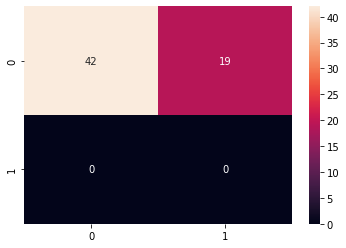

In [ ]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [ ]:
print('Accuracy is:', accuracy_score(y_test, y_pred))

Accuracy is: 0.6885245901639344


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.4s finished


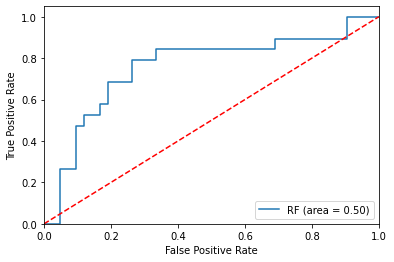

In [ ]:
import seaborn as sns  # data visualization library  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        42
           1       0.00      0.00      0.00        19

    accuracy                           0.69        61
   macro avg       0.34      0.50      0.41        61
weighted avg       0.47      0.69      0.56        61



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Applying Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean accuracy: %.3f' % mean(scores))
print("Standard Deviation accuracy: {:.2f} ".format(scores.std()))

Mean accuracy: 0.690
Standard Deviation accuracy: 0.01 


In [ ]:
#from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
from scipy import interp
from sklearn.metrics import roc_curve, auc
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

#cv = StratifiedKFold(n_splits=10,shuffle=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.3s finished
<ipython-input-53-6367600a48db>:17: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend wi

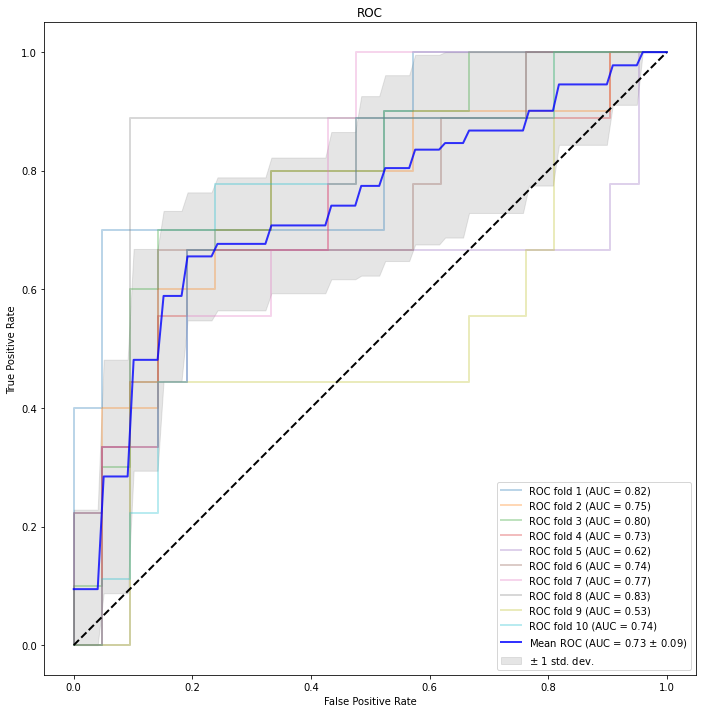

In [ ]:

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
    
      
for train_index, test_index in cv.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]  
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]    
    prediction = classifier.fit(X_train,y_train).predict_proba(X_test)
    fpr, tpr, t = roc_curve(y_test, prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)


std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#kf = StratifiedKFold(n_splits=10,shuffle=True, random_state=16)
kf= RepeatedStratifiedKFold(n_splits=10, n_repeats=1,random_state=65)
cvscores = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
Scores1 = []
Scores2 = []
X= X.values
y= y.values

<Figure size 720x720 with 0 Axes>

In [ ]:
for fold, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    model = RandomForestClassifier(n_estimators=1000,
                                   criterion = 'entropy',
                                   min_samples_leaf= 1,
                                   min_samples_split= 2,
                                   random_state=0, 
                                   max_features= 'sqrt',
                                   n_jobs=-1, verbose = 1)  # Choose a model here
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    #    print(f'For fold {fold}:')
#    print(f'Accuracy: {model.score(X_test, y_test)}')
#    print(f'AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1])}')
    Scores1.append(model.score(X_test, y_test))
    Scores2.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s


In [ ]:
import statistics
print('Mean Accuracy with CV: %.3f' % mean(Scores1))
print('Standard Deviation accuracy: %.3f' % statistics.stdev(Scores1))

Mean Accuracy with CV: 0.693
Standard Deviation accuracy: 0.011


In [ ]:
print('Mean AUC ROC with CV: %.3f' % mean(Scores2))
print('Standard Deviation AUC ROC: %.3f' % statistics.stdev(Scores2))

Mean AUC ROC with CV: 0.731
Standard Deviation AUC ROC: 0.055


In [ ]:
col = df.columns       
drop_cols = ['Death']
features= df.drop(drop_cols,axis = 1 )
feature_list = list(features.columns)

In [ ]:
import shap
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(df_WORK)
# 0 metformina
# 1 lina + metformina 

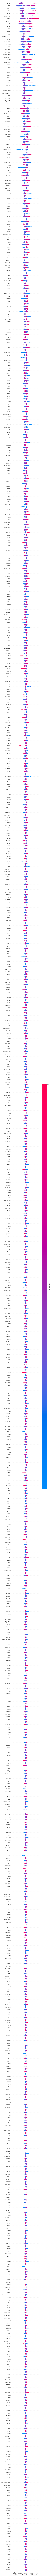

In [ ]:
shap.summary_plot(shap_values[0], df_WORK, max_display=1000)

In [ ]:
import umap
fit = umap.UMAP(n_components =3,n_neighbors=15,metric='cosine') 
%time u_s = fit.fit_transform(shap_values[0])

CPU times: user 5.65 s, sys: 17.5 ms, total: 5.66 s
Wall time: 8.18 s


In [ ]:
u_s2 = pd.DataFrame(u_s, columns=['UMAP1', 'UMAP2','UMAP3'])
u_s2

,UMAP1,UMAP2,UMAP3
0,-1.839737,3.784571,8.652267
1,-5.075025,3.586994,6.238202
2,-5.439664,4.690009,6.193026
3,-5.174489,4.686854,6.083689
4,-5.202229,4.168377,6.011681
...,...,...,...
298,1.188165,3.908730,10.306239
299,-5.752044,3.319585,6.487364
300,1.684336,3.634486,10.249350
301,2.092842,4.659128,10.400547


In [ ]:
import plotly.express as px
fig = px.scatter_3d(u_s2, x='UMAP1', y='UMAP2', z='UMAP3',
              color=df['Cancer Type'].astype("category"))
fig.update_traces(marker=dict(size=3))
fig.show()


In [ ]:
import plotly.express as px
fig = px.scatter_3d(u_s2, x='UMAP1', y='UMAP2', z='UMAP3',
              color=df['Death'].astype("category"))
fig.update_traces(marker=dict(size=3))
fig.show()

In [ ]:
df_tags['Cancer Type']

Unnamed: 0
TCGA-A1-A0SD-01A    BREAST
TCGA-A2-A04N-01A    BREAST
TCGA-A2-A04U-01A    BREAST
TCGA-A2-A04W-01A    BREAST
TCGA-A2-A0CL-01A    BREAST
                     ...  
TCGA-66-2792-01A      LUNG
TCGA-66-2793-01A      LUNG
TCGA-66-2794-01A      LUNG
TCGA-66-2795-01A      LUNG
TCGA-66-2800-01A      LUNG
Name: Cancer Type, Length: 303, dtype: object

In [ ]:
shap_values[0]

array([[ 2.45111075e-05,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.79559479e-05,  1.12707629e-05],
       [-1.51423528e-04,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -4.07871238e-05,  5.30767548e-06],
       [-3.38774153e-05,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  5.41243638e-05,  1.67516915e-05],
       ...,
       [-5.49452113e-05,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -9.87966565e-05, -4.12867297e-06],
       [-7.74711490e-05,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  2.44801815e-05,  1.06191649e-05],
       [-8.34456794e-05,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -5.23038611e-05, -2.89378915e-05]])

In [ ]:
df = pd.DataFrame(shap_values[0], columns= df_WORK.columns)

In [ ]:
df_tags

,Survival,Death,Cancer Type
Unnamed: 0,,,
TCGA-A1-A0SD-01A,437,0,BREAST
TCGA-A2-A04N-01A,3153,0,BREAST
TCGA-A2-A04U-01A,670,0,BREAST
TCGA-A2-A04W-01A,1918,0,BREAST
TCGA-A2-A0CL-01A,1827,0,BREAST
...,...,...,...
TCGA-66-2792-01A,913,1,LUNG
TCGA-66-2793-01A,306,0,LUNG
TCGA-66-2794-01A,1645,1,LUNG


In [ ]:
tags_1= df_tags.reset_index()

In [ ]:
tags_1

,Unnamed: 0,Survival,Death,Cancer Type
0,TCGA-A1-A0SD-01A,437,0,BREAST
1,TCGA-A2-A04N-01A,3153,0,BREAST
2,TCGA-A2-A04U-01A,670,0,BREAST
3,TCGA-A2-A04W-01A,1918,0,BREAST
4,TCGA-A2-A0CL-01A,1827,0,BREAST
...,...,...,...,...
298,TCGA-66-2792-01A,913,1,LUNG
299,TCGA-66-2793-01A,306,0,LUNG
300,TCGA-66-2794-01A,1645,1,LUNG
301,TCGA-66-2795-01A,122,1,LUNG


In [ ]:
import plotly.express as px
fig = px.scatter_3d(u_s2, x='UMAP1', y='UMAP2', z='UMAP3',
              color=(df['APOB']))
fig.update_traces(marker=dict(size=3))
fig.show()

UMAP DE SÓLO LOS CANCERES

In [ ]:
import umap
fit = umap.UMAP(n_components=3,n_neighbors=10,verbose= True,metric='cosine',random_state=42) 
%time u_s = fit.fit_transform(df_WORK)

UMAP(angular_rp_forest=True, metric='cosine', n_components=3, n_neighbors=10, random_state=42, verbose=True)
Mon Feb 27 19:20:41 2023 Construct fuzzy simplicial set
Mon Feb 27 19:20:44 2023 Finding Nearest Neighbors
Mon Feb 27 19:20:44 2023 Finished Nearest Neighbor Search
Mon Feb 27 19:20:44 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon Feb 27 19:20:51 2023 Finished embedding
CPU times: user 4.73 s, sys: 26.8 ms, total: 4.76 s
Wall time: 11.1 s


In [ ]:
u_s = pd.DataFrame(u_s, columns=['UMAP1', 'UMAP2','UMAP3'])
u_s

,UMAP1,UMAP2,UMAP3
0,11.201483,5.399252,2.708144
1,11.274113,5.495891,2.898629
2,7.308668,4.561608,1.109637
3,9.037181,4.983468,2.211736
4,10.471301,5.788861,3.347052
...,...,...,...
298,8.488302,7.283199,5.473030
299,9.419485,7.001294,5.639811
300,8.335807,7.555564,5.068290
301,8.433023,7.909472,4.496264


In [ ]:
import plotly.express as px
fig = px.scatter_3d(u_s, x='UMAP1', y='UMAP2', z='UMAP3',
              color=df['Death'].astype("category"))
fig.update_traces(marker=dict(size=3))
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(u_s, x='UMAP1', y='UMAP2', z='UMAP3',
              color=df_tags['Cancer Type'].astype("category"))
fig.update_traces(marker=dict(size=3))
fig.show()

In [ ]:
df_tags

,Survival,Death,Cancer Type
Unnamed: 0,,,
TCGA-A1-A0SD-01A,437,0,BREAST
TCGA-A2-A04N-01A,3153,0,BREAST
TCGA-A2-A04U-01A,670,0,BREAST
TCGA-A2-A04W-01A,1918,0,BREAST
TCGA-A2-A0CL-01A,1827,0,BREAST
...,...,...,...
TCGA-66-2792-01A,913,1,LUNG
TCGA-66-2793-01A,306,0,LUNG
TCGA-66-2794-01A,1645,1,LUNG


In [ ]:
df_tags['Cancer Type']
df_tags['Survival']
df_tags['Death']


Unnamed: 0
TCGA-A1-A0SD-01A    0
TCGA-A2-A04N-01A    0
TCGA-A2-A04U-01A    0
TCGA-A2-A04W-01A    0
TCGA-A2-A0CL-01A    0
                   ..
TCGA-66-2792-01A    1
TCGA-66-2793-01A    0
TCGA-66-2794-01A    1
TCGA-66-2795-01A    1
TCGA-66-2800-01A    1
Name: Death, Length: 303, dtype: int64